# Apple stock price prediction

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# data cleaning

In [3]:
df=pd.read_csv("AAPL.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,147.809998,153.139999,147.699997,150.470001,149.671097,84457100
1,2023-03-14,151.279999,153.399994,150.100006,152.589996,151.779846,73695900
2,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.177719,77167900
3,2023-03-16,152.160004,156.460007,151.639999,155.850006,155.022537,76161100
4,2023-03-17,156.080002,156.740005,154.279999,155.000000,154.177048,98944600
...,...,...,...,...,...,...,...
245,2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
246,2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
247,2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700
248,2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100


In [5]:
df.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2023-03-13  147.809998  153.139999  147.699997  150.470001  149.671097   
1    2023-03-14  151.279999  153.399994  150.100006  152.589996  151.779846   
2    2023-03-15  151.190002  153.250000  149.919998  152.990005  152.177719   
3    2023-03-16  152.160004  156.460007  151.639999  155.850006  155.022537   
4    2023-03-17  156.080002  156.740005  154.279999  155.000000  154.177048   
..          ...         ...         ...         ...         ...         ...   
245  2024-03-04  176.149994  176.899994  173.789993  175.100006  175.100006   
246  2024-03-05  170.759995  172.039993  169.619995  170.119995  170.119995   
247  2024-03-06  171.059998  171.240005  168.679993  169.119995  169.119995   
248  2024-03-07  169.149994  170.729996  168.490005  169.000000  169.000000   
249  2024-03-08  169.000000  173.699997  168.940002  170.729996  170.729996   

       Volume  
0    

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.describe

<bound method NDFrame.describe of            Date        Open        High         Low       Close   Adj Close  \
0    2023-03-13  147.809998  153.139999  147.699997  150.470001  149.671097   
1    2023-03-14  151.279999  153.399994  150.100006  152.589996  151.779846   
2    2023-03-15  151.190002  153.250000  149.919998  152.990005  152.177719   
3    2023-03-16  152.160004  156.460007  151.639999  155.850006  155.022537   
4    2023-03-17  156.080002  156.740005  154.279999  155.000000  154.177048   
..          ...         ...         ...         ...         ...         ...   
245  2024-03-04  176.149994  176.899994  173.789993  175.100006  175.100006   
246  2024-03-05  170.759995  172.039993  169.619995  170.119995  170.119995   
247  2024-03-06  171.059998  171.240005  168.679993  169.119995  169.119995   
248  2024-03-07  169.149994  170.729996  168.490005  169.000000  169.000000   
249  2024-03-08  169.000000  173.699997  168.940002  170.729996  170.729996   

       Volume  
0

# data visualization

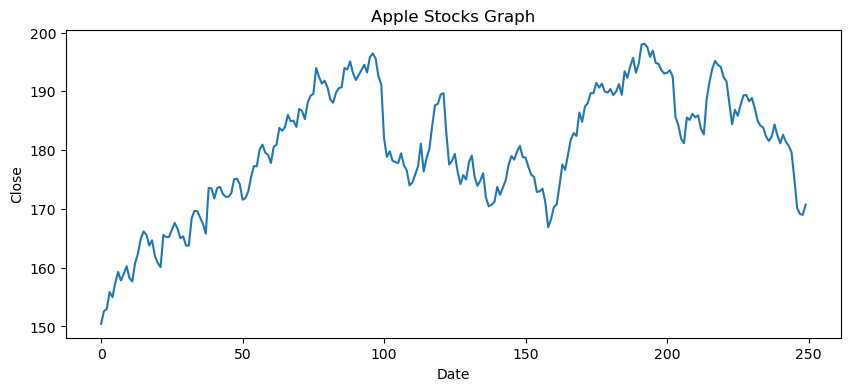

In [19]:
plt.figure(figsize=(10,4))
plt.title("Apple Stocks Graph")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.994651  0.994923  0.987319   0.987307 -0.194722
High       0.994651  1.000000  0.995145  0.994500   0.994369 -0.164593
Low        0.994923  0.995145  1.000000  0.995221   0.994885 -0.215146
Close      0.987319  0.994500  0.995221  1.000000   0.999744 -0.196332
Adj Close  0.987307  0.994369  0.994885  0.999744   1.000000 -0.194548
Volume    -0.194722 -0.164593 -0.215146 -0.196332  -0.194548  1.000000


/var/folders/62/d57bp4nd46q8f2jqy6yhv51m0000gn/T/ipykernel_19364/2458726984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
/var/folders/62/d57bp4nd46q8f2jqy6yhv51m0000gn/T/ipykernel_19364/2458726984.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


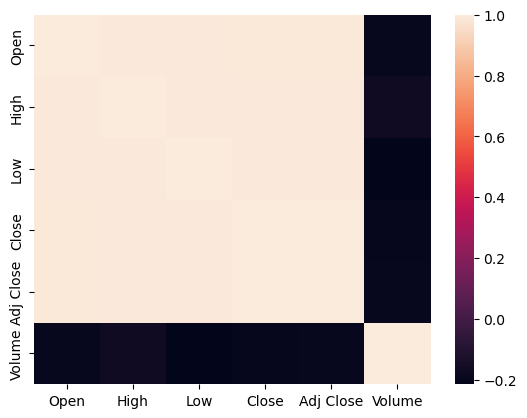

In [25]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

In [28]:
x = df[["Open", "High", "Low"]]
y = df["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0      173.970001
1      157.649994
2      194.500000
3      178.179993
4      178.720001
